Load sampler and sample


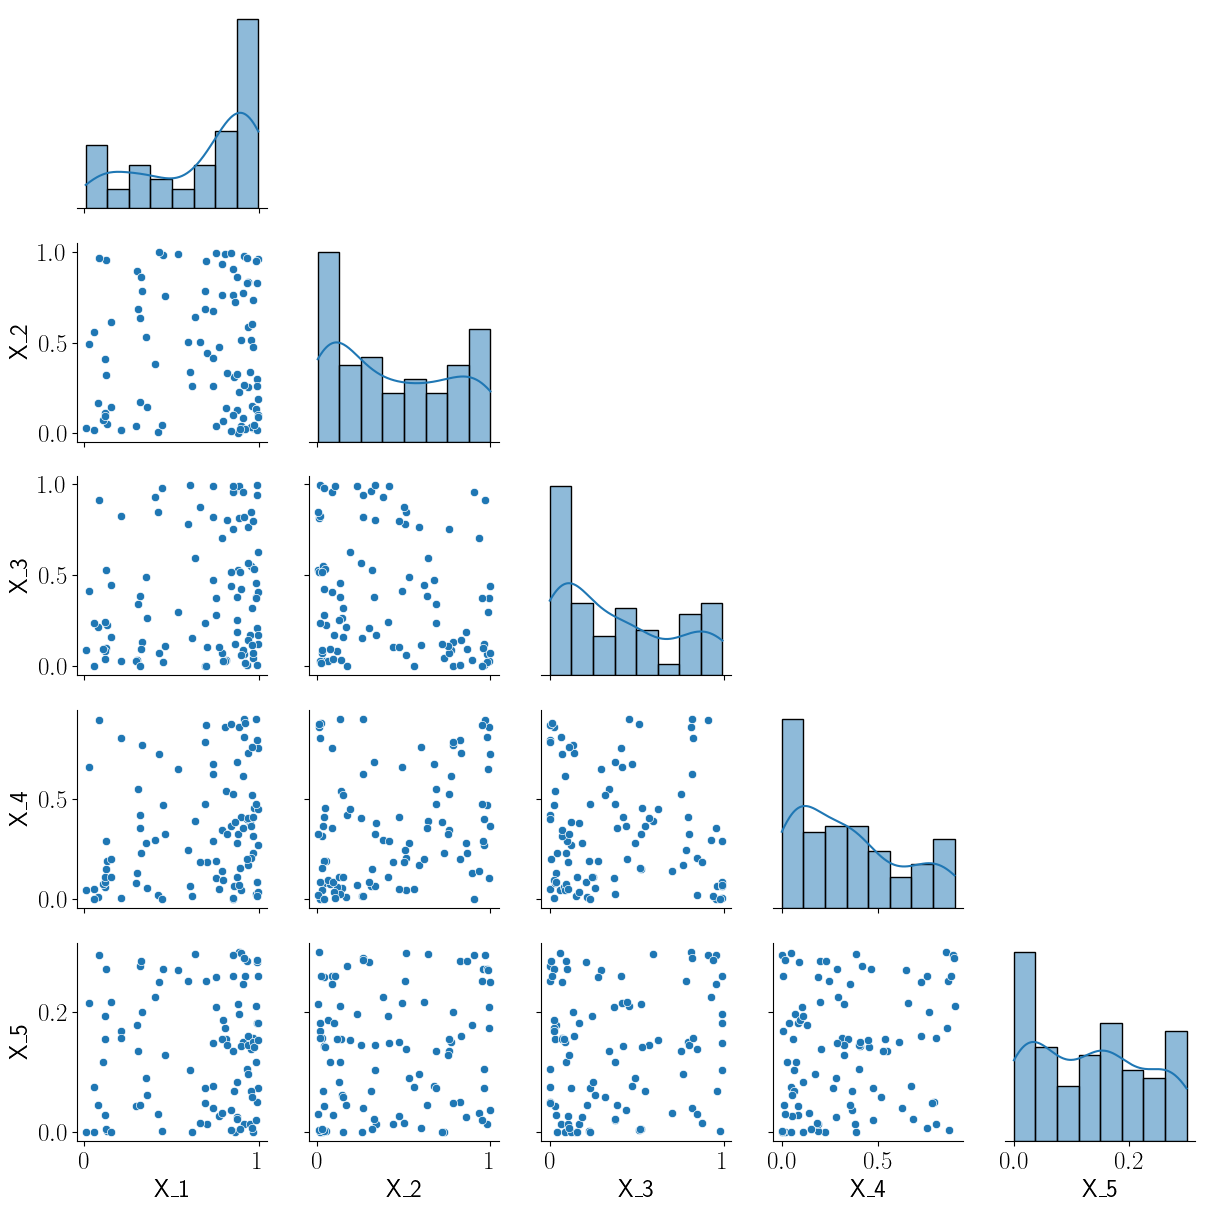

In [1]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###################################################
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
###########################################


# colors
blue, orange, magenta, grey, green = '#0db4c3', '#eea021', '#ff0364', '#606172', '#3fb532'

# ===========================================================================


#long to run???
jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")


print('Load sampler and sample')
jl.seval("""sampler = SMT.load_sampler("smp.jld2")""")
jl.seval("""sample = rand(sampler, 100) #10 000 samples""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))



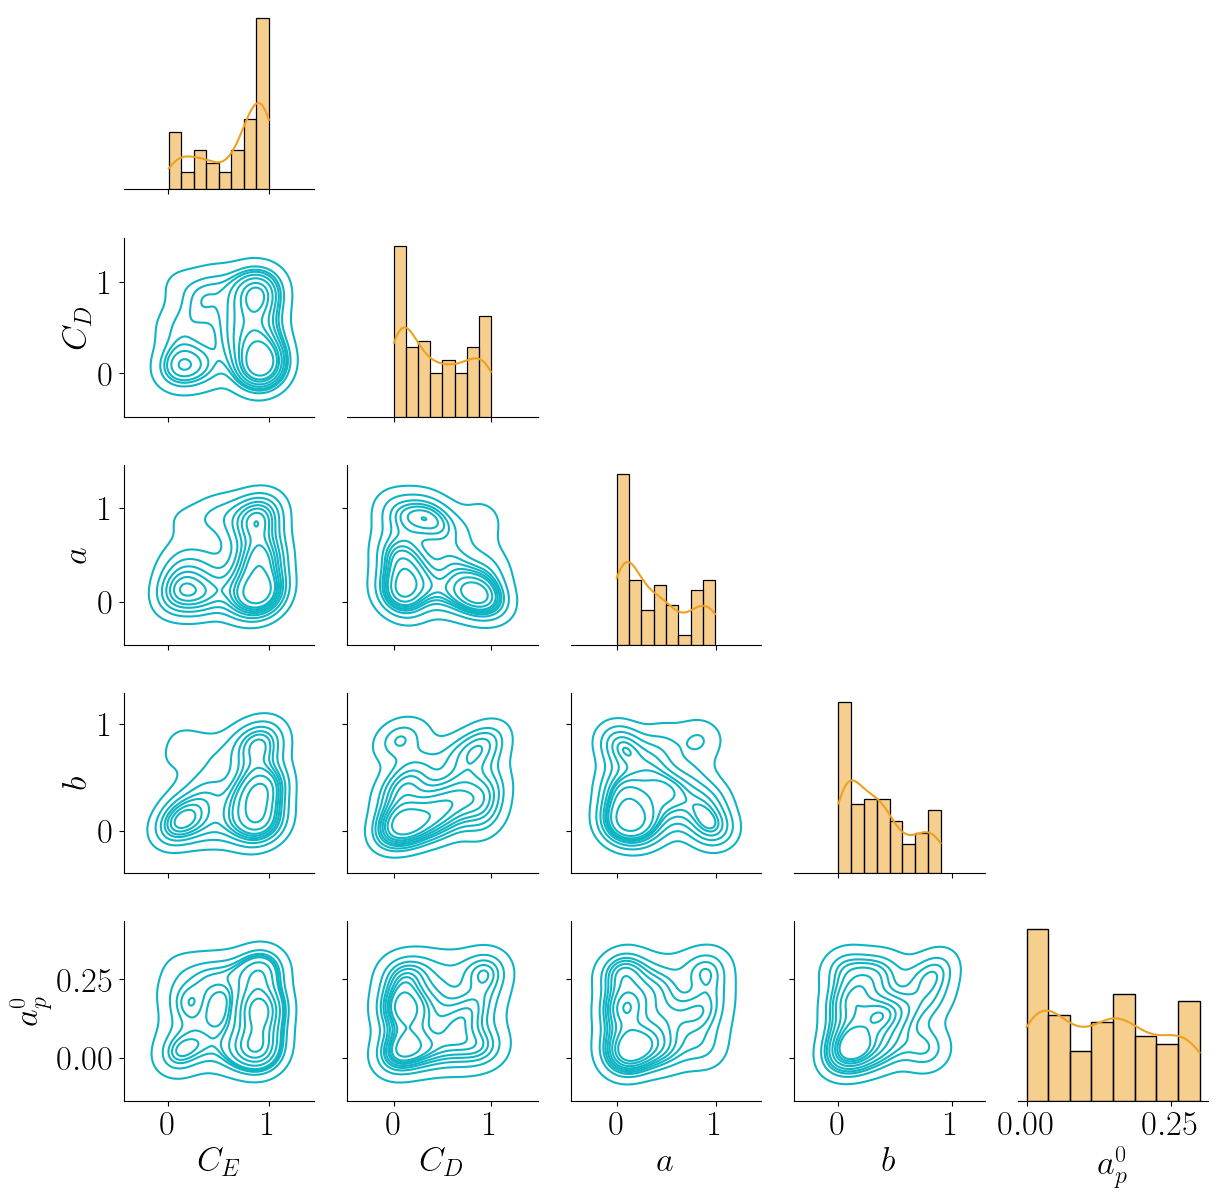

In [18]:
#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$C_D$', r'$a$', r'$b$', r'$a_p^0$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, color=blue)
#g.map_lower(sns.scatterplot)

g.map_diag(sns.histplot, kde=True, color=orange )